<a href="https://colab.research.google.com/github/lokeshkumarn/OpenCV/blob/main/OpenCV_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the necessary packages

In [1]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 5.9 MB/s 


In [2]:
!pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 8.0 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import cv2
import argparse
from __future__ import print_function

In [4]:
print("hello")

hello


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Image

In [6]:
dog_image = cv2.imread('/content/drive/MyDrive/Data/dog.jpg')
print(f"image width is {dog_image.shape[1]} and height is {dog_image.shape[0]}")
print(f"number of channels in dog image is {dog_image.shape[2]}")

image width is 1024 and height is 768
number of channels in dog image is 3


In [7]:
import matplotlib
from matplotlib import pyplot as plt

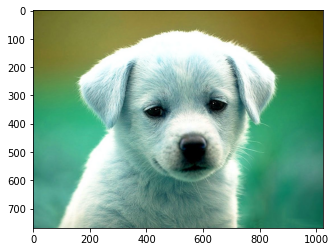

In [8]:
plt.imshow(dog_image)

If we use the Matplotlib plt.imshow method instead of cv2.imshow method we can see the difference in the original image. so we have to read the cv2 image in a different way for that, we create a reusable method to reverse the channels, because cv2 imreads reads rgb channel images as bgr, so we have reverse the channels to rgb before displaying using matplotlib

In [9]:
def bgr_to_rgb(img_data):
  new_img = img_data[:,:,::-1]
  return new_img

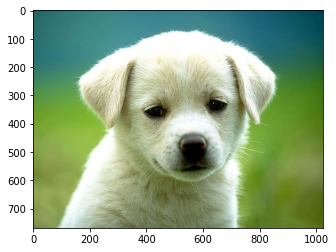

In [10]:
tmp = bgr_to_rgb(dog_image)
plt.imshow(tmp)

above image is the original image

just to cross check the channels values, whether it is reversed or not

In [11]:
tmp[:,:,0]

array([[ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       ...,
       [120, 120, 119, ...,  83,  82,  82],
       [119, 118, 117, ...,  85,  85,  85],
       [118, 118, 117, ...,  84,  84,  85]], dtype=uint8)

In [12]:
dog_image[:,:,2]

array([[ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       ...,
       [120, 120, 119, ...,  83,  82,  82],
       [119, 118, 117, ...,  85,  85,  85],
       [118, 118, 117, ...,  84,  84,  85]], dtype=uint8)

### Write Image

In [13]:
cv2.imwrite("/content/drive/MyDrive/Data/new_dog_image.jpg", dog_image)

True

### Image data understanding

get the left side corner part of the image across all the channels

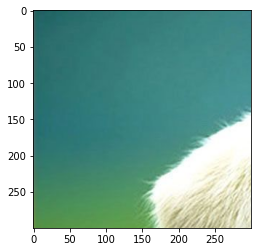

In [14]:
left_corner = dog_image[0:300, 0: 300, :]
plt.imshow(bgr_to_rgb(left_corner))

creating resuable method to convert bgr to rgb and show using matplotlib pyplot

In [15]:
from matplotlib import pyplot as plt
def show_cv2(image_data):
  plt.imshow(bgr_to_rgb(image_data))

set a different values for the corner pixels

In [16]:
tmp_image = dog_image.copy()

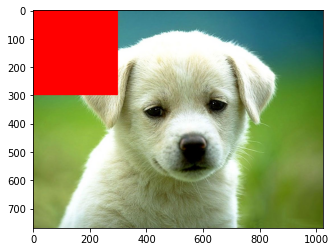

In [17]:
tmp_image[0:300,0:300] = (0,0,255) # (b,g,r) in open cv or cv2
show_cv2(tmp_image)

### Draw shapes using open cv

In [18]:
tmp_image = dog_image.copy()

In [19]:
red = (0,0,255)
green = (0,255,0)
blue= (255,0,0)

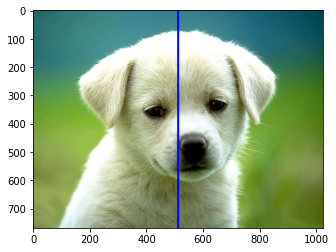

In [20]:
cv2.line(tmp_image, (512,0),(512, 767),blue, 5) #blue line with thickness - 5
show_cv2(tmp_image)

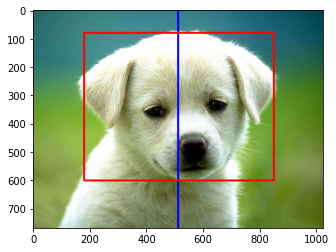

In [21]:
cv2.rectangle(tmp_image, (180,80),(850, 600),red, 5) #red rectange with thickness - 5
show_cv2(tmp_image)

512 384


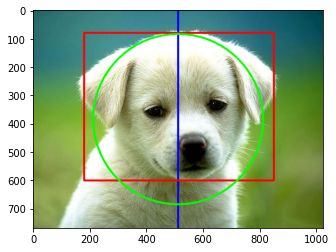

In [22]:
centerX, centerY = tmp_image.shape[1] // 2, tmp_image.shape[0] //2
print(centerX, centerY )
cv2.circle(tmp_image, (centerX,centerY),300, green, 5) #green circle with radius 300 and with thickness - 5
show_cv2(tmp_image)

### Image Processing

In [23]:
import numpy as np

In [24]:
tmp_image = dog_image.copy()

Translation 

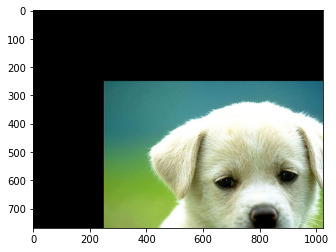

In [25]:
#Shift Down and Right
M = np.float32([[1,0,250],[0,1,250]]) # shift matrix for down and right
shifted_up_left = cv2.warpAffine(tmp_image, M, (tmp_image.shape[1], tmp_image.shape[0]))
show_cv2(shifted_up_left)

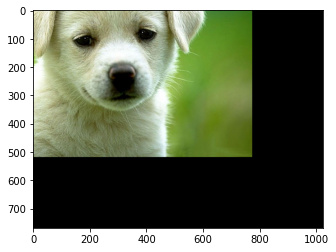

In [26]:
#Shift Up and Left
M = np.float32([[1,0,-250],[0,1,-250]]) # shift matrix for up and left with negative values
shifted_up_left = cv2.warpAffine(tmp_image, M, (tmp_image.shape[1], tmp_image.shape[0]))
show_cv2(shifted_up_left)

In [27]:
import imutils #included the transformations to the imutils module

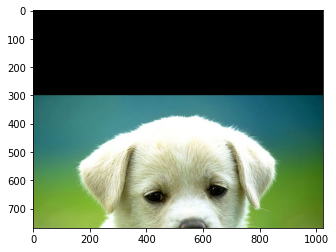

In [28]:
shift_down = imutils.translate(tmp_image, 0, 300)
show_cv2(shift_down)

Rotation

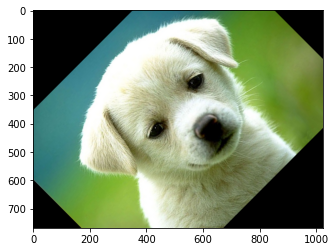

In [29]:
(h,w) = tmp_image.shape[:2]
center = (w//2, h//2)

#Get Rotation Matrix
M = cv2.getRotationMatrix2D(center, 45, 1.0) #45 degree rotation from center with same dimension 1.0

rotated = cv2.warpAffine(tmp_image, M, (w, h))

show_cv2(rotated)

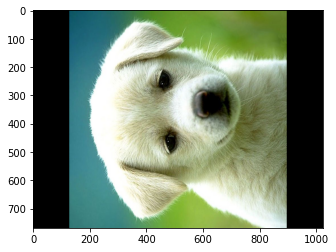

In [30]:
show_cv2(imutils.rotate(tmp_image, 90)) #rotate 90 deg

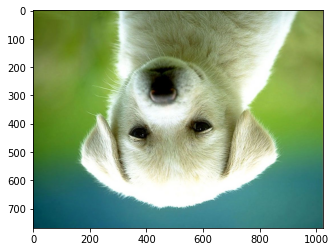

In [31]:
show_cv2(imutils.rotate(tmp_image, 180)) #rotate 90 deg

Resize

150 112


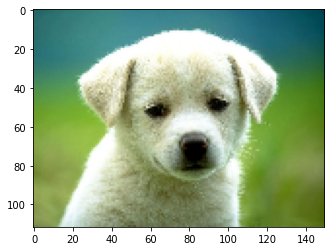

In [38]:
#resize to 100px width
w = 150
#aspect ratio
r = w / tmp_image.shape[1]

h = int(tmp_image.shape[0] * r) # old height * aspect ratio

print(w,h)

show_cv2(cv2.resize(tmp_image, (w,h), cv2.INTER_AREA))